**Step 1** Data preprocessing

In [302]:
import pandas as pd
df = pd.read_csv("heart_disease_dataset.csv")
print(df.shape)
df.head()

(1000, 16)


,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [288]:
d_gender = {"Female": 0, "Male": 1}
d_smoking = {"Heavy": 3, "Current": 0, "Former": 1, "Never": 2}
d_alcohol = {"Heavy": 0, "Moderate": 1, None: 2}
d = {"Yes": 1, "No": 0}
d_type = {"Atypical Angina": 0, "Typical Angina": 1, "Non-anginal Pain": 2, "Asymptomatic": 3}

df["Gender"] = df["Gender"].map(d_gender)
df["Smoking"] = df["Smoking"].map(d_smoking)
df["Alcohol Intake"] = df ["Alcohol Intake"].map(d_alcohol)
df["Family History"] = df["Family History"].map(d)
df["Diabetes"] = df["Obesity"].map(d)
df["Exercise Induced Angina"] = df["Exercise Induced Angina"].map(d)
df["Chest Pain Type"] = df["Chest Pain Type"].map(d_type)
df["Obesity"] = df["Obesity"].map(d)
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,0,228,119,66,0,0.0,1,0,1,1,8,119,1,0,1
1,48,1,204,165,62,0,NaN,5,0,0,0,9,70,1,1,0
2,53,1,234,91,67,2,0.0,3,1,1,1,5,196,1,0,1
3,69,0,192,90,72,0,NaN,4,0,0,0,7,107,1,2,0
4,62,0,172,163,93,2,NaN,6,0,0,0,2,183,1,3,0


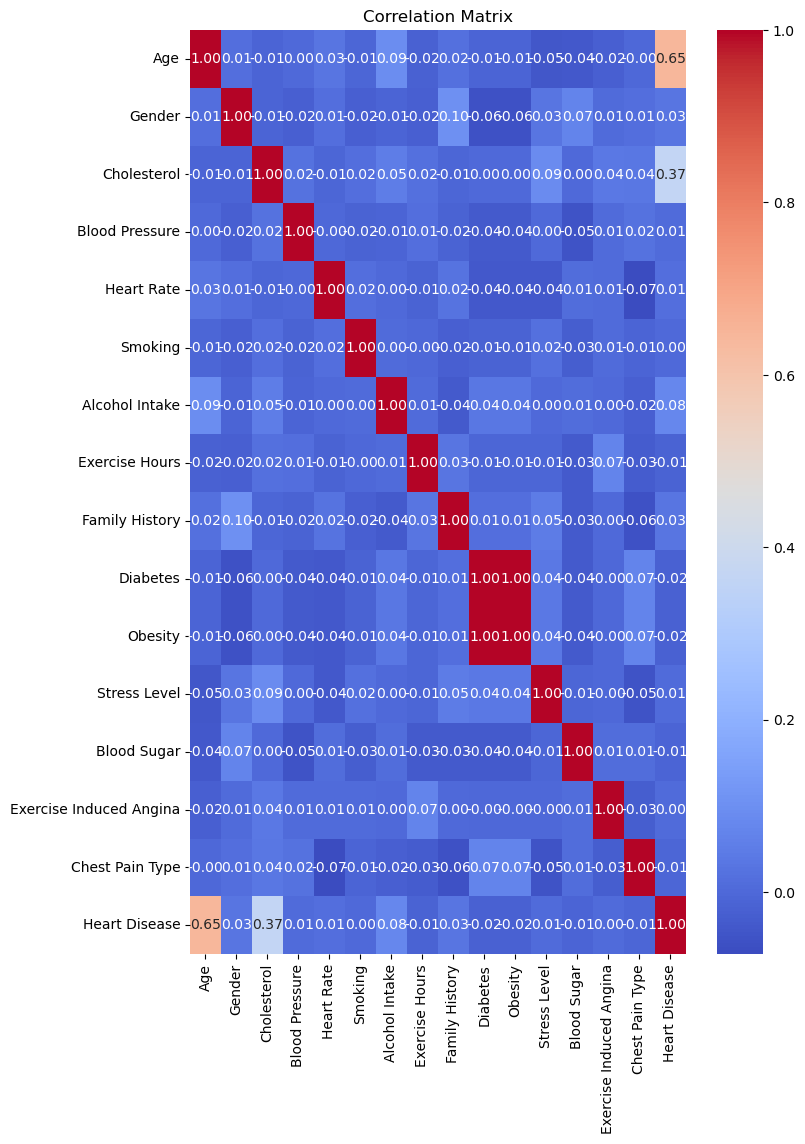

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(8, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show() 


**Step 2** Train Test Split 

In [292]:
from sklearn.model_selection import train_test_split, cross_val_score

# columns = ["Age", "Gender", "Cholesterol", "Blood Pressure", "Heart Rate", "Smoking", "Alcohol Intake", "Exercise Hours", "Family History", "Diabetes", "Obesity", "Stress Level", "Blood Sugar", "Exercise Induced Angina", "Chest Pain Type"]
columns = ["Age", "Gender", "Cholesterol", "Blood Pressure", "Heart Rate", "Alcohol Intake", "Exercise Hours", "Family History", "Diabetes", "Obesity", "Stress Level", "Blood Sugar", "Chest Pain Type"]

x = df[columns]
y = df["Heart Disease"]
df_features.head()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

**Step 3** Converting data to DMatrix

In [293]:
import xgboost as xgb

train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

In [219]:
param = {
    'max_depth': 10,
    'eta': 0.001,
    'objective': 'binary:hinge'} 

epochs = 1000

In [220]:
model = xgb.train(param, train, epochs)

In [221]:
predictions = model.predict(test)
print(predictions)

[1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 0.]


In [222]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

1.0

In [223]:
train = xgb.DMatrix(x, label=y) 

In [224]:
xgb.cv(
    param,
    train,
    nfold=30,
    callbacks=[xgb.callback.EvaluationMonitor(show_stdv=False)],
)

[0]	train-error:0.60800	test-error:0.60817
[1]	train-error:0.60800	test-error:0.60817
[2]	train-error:0.60800	test-error:0.60817
[3]	train-error:0.60800	test-error:0.60817
[4]	train-error:0.60800	test-error:0.60817
[5]	train-error:0.60800	test-error:0.60817
[6]	train-error:0.60800	test-error:0.60817
[7]	train-error:0.60800	test-error:0.60817
[8]	train-error:0.60800	test-error:0.60817
[9]	train-error:0.60800	test-error:0.60817


,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.608,0.002726,0.60817,0.07948
1,0.608,0.002726,0.60817,0.07948
2,0.608,0.002726,0.60817,0.07948
3,0.608,0.002726,0.60817,0.07948
4,0.608,0.002726,0.60817,0.07948
5,0.608,0.002726,0.60817,0.07948
6,0.608,0.002726,0.60817,0.07948
7,0.608,0.002726,0.60817,0.07948
8,0.608,0.002726,0.60817,0.07948
9,0.608,0.002726,0.60817,0.07948


In [230]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [232]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [233]:
cv_results = grid_search.cv_results_

# Accessing mean scores for each parameter combination
means = cv_results['mean_test_score']

# Finding the index of the best model (highest mean accuracy)
best_model_idx = means.argmax()

# Printing performance metrics for the best model
print("Best Model Performance:")
print(f"Mean Accuracy: {means[best_model_idx]}")
print(f"Parameters: {cv_results['params'][best_model_idx]}")


Best Model Performance:
Mean Accuracy: 1.0
Parameters: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [249]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
param = {'max_depth': 2, 'max_features': None,  'min_samples_split': 2, 'n_estimators': 100}
model = RandomForestClassifier(**param)
scores = cross_val_score(model, x, y, cv=50)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print(scores.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
1.0


In [248]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
param = {}
model = RandomForestClassifier(**param)
scores = cross_val_score(model, x, y, cv=20)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print(scores.mean())

[1.   1.   1.   1.   1.   0.98 1.   1.   1.   1.   1.   1.   1.   0.98
 1.   1.   1.   1.   1.   1.  ]
0.998


In [252]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
param = {'max_depth': 3, 'max_features': None,  'min_samples_split': 3, 'n_estimators': 100}
model = RandomForestClassifier(**param)
scores = cross_val_score(model, x, y, cv=5)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print(scores.mean())

[1. 1. 1. 1. 1.]
1.0


In [295]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
x.fillna(x.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=55)  # Adjust n_neighbors as needed
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.855


C:\Users\Fredrick\AppData\Local\Temp\ipykernel_7040\1316113526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.fillna(x.mean(), inplace=True)


In [297]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

def find_optimal_k(X, y):
  # Create a range of k values
  k_values = range(1, 100)

  # Create a dictionary to store models for different k values
  param_grid = {'n_neighbors': k_values}

  # Create a KNN classifier
  knn = KNeighborsClassifier()

  # Create a grid search object
  grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

  # Fit the grid search to the data
  grid_search.fit(X, y)

  # Print the best parameters and score
  print("Best parameters:", grid_search.best_params_)
  print("Best score:", grid_search.best_score_)

  return grid_search.best_params_['n_neighbors']

find_optimal_k(X_train, y_train)


Best parameters: {'n_neighbors': 61}
Best score: 0.8662500000000002


61

In [298]:
knn = KNeighborsClassifier(n_neighbors=61)  # Adjust n_neighbors as needed
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.85


In [299]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


precision = precision_score(y_test, y_pred, average='weighted')
  # Adjust average as needed
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')  # Adjust average as needed
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # Adjust average as needed
print("F1-score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Precision: 0.8600514258999533
Recall: 0.85
F1-score: 0.8454427083333332
Confusion Matrix:
 [[113   5]
 [ 25  57]]


In [304]:
scores = cross_val_score(knn, x, y, cv=20)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print(scores.mean())

[0.9  0.88 0.88 0.94 0.94 0.86 0.88 0.98 0.96 0.94 0.92 0.96 0.96 0.9
 0.9  0.94 0.82 0.94 0.88 0.92]
0.915
